# Irrigation Methods
This notebook can be run to recreate the analysis done to study irrigation methods.

Import the library to run the experiments and initiate the classes.

In [1]:
import sys; sys.path.append("../../../")
import tara.SongroveBotanicals.research as hub
irrigation = hub.Irrigation()
%matplotlib inline

### Load the Data
Run the cells below to run the data gathered for the experiment.  For more on how the data was collected see https://www.stellargrove.com/irrigation-methods.  The data returned is broken into two dataframes: yield and growth rate.

In [2]:
df_Yield, df_GrowthRate = irrigation.loadData()


## Examine the Data 
Run this cell if you want to see what it looks like after being transformed into a usable state.

In [3]:
df_Yield.head()

IrrigationType,Drip,Flood,Furrow,Sprinkler
TrialNumber,,,,
1,10.2,9.8,9.6,8.9
2,11.5,10.1,9.8,9.1
3,12.3,10.2,9.9,8.8
4,11.8,10.5,9.7,9.5
5,10.9,9.7,9.4,8.7


## First: Examine the Yield of the different methods


To begin we will take a quick visual representation of what the data looks like in order to understand whether or not our initial hypothesis looks like it will hold true or not.

### Yield Box Plots
Running the cell below will create a simple box plot for you to view how the data is distributed amongst the different irrigation methods. 

<AxesSubplot:>

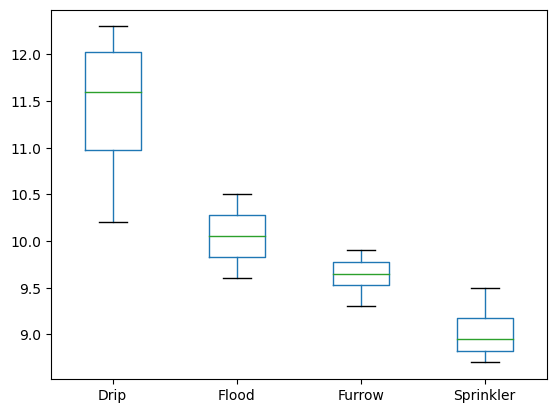

In [4]:
df_Yield.boxplot(grid=False)

Now that a visual representation has been established let's use stats to ensure that our intuition holds up to mathematical rigor.

### Calculate the Mean Yield
For each of the different Irrigation Methods, calculate the mean yield of the crop grown.  The mean along with the Standard Deviation will give us an idea of whether or not we can make claims that one method is better than another.

In [5]:
yields = irrigation.calculateMeans(df_Yield,sort_order="d")
yields

,Method,AverageYield
0,Drip,11.47
1,Flood,10.05
2,Furrow,9.63
3,Sprinkler,9.02


### Write Out Hypothesis
Looking at the means, it is natural to rank the effectiveness of the methods as:
<ol>
    <li>Drip
    <li>Flood
    <li>Furrow
    <li>Sprinkler
</ol>

In the next section we will use ANOVA analysis to confirm our assumptions.

In [7]:
f_Yield, p_Yield = irrigation.runANOVA(df_Yield)
print(f_Yield, p_Yield)

65.4732517189334 1.18861600663583e-14


In [8]:
dominance_results = irrigation.runDominance(df_Yield,"t-test")
dominance_results

,Method 1,Method 2,Mean 1,Mean 2,TestStat,p-value,pValSig
5,Furrow,Sprinkler,9.63,9.02,6.110192,0.000009,True
3,Flood,Furrow,10.05,9.63,3.722016,0.001560,True
4,Flood,Sprinkler,10.05,9.02,8.255425,0.000000,True
0,Drip,Flood,11.47,10.05,5.985177,0.000012,True
1,Drip,Furrow,11.47,9.63,8.172622,0.000000,True
2,Drip,Sprinkler,11.47,9.02,10.590075,0.000000,True


## Next: Examine the Growth Rates of the Different Methods

<AxesSubplot:>

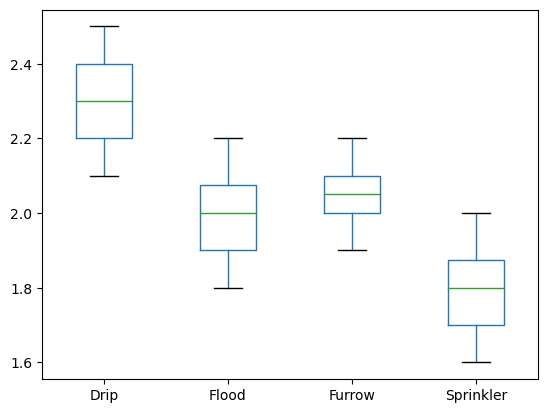

In [8]:
df_GrowthRate.boxplot(grid=False)

Looking at box plot above, it looks as though the ranking of the methods for growth rate is: 
1. Drip
2. Furrow
3. Flood
4. Sprinkler